# BibRec: Training Random Forest Model

### Evaluation API: Predict top rated books for 20-year old american User
Input for the model is a list of top rated books along with the user information

In [12]:
# Load the model from the file
model_file = "rf6-ex6.pkl"

In [13]:
from bibrec.server.Utils import *

books, users, ratings = get_normalized_data(books_path='data/BX-Books.csv',
                                            users_path='data/BX-Users.csv',
                                            ratings_path='data/BX-Book-Ratings.csv')
books = books.drop(["isbn"], axis=1)
ratings = ratings.drop(["isbn"], axis=1)

/run/media/fab/Dev/repos/FH-SBG/MMT1/RES/recommender-systems/bibrec/server/Utils.py:12: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path, sep=";", encoding="latin-1")
/run/media/fab/Dev/repos/FH-SBG/MMT1/RES/recommender-systems/bibrec/server/Utils.py:94: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  location_seperated = users.location.str.split(',', 2, expand=True)


In [25]:
user = pd.DataFrame([{
    'age': 20,
    'city': None,
    'state': None,
    'country': "usa"
}])
df_user = user
df_user = normalize_country(df_user, users.country)
df_user = normalize_state(df_user)
df_user = hot_encode_users(df_user)
df_user = df_user.filter(regex="age|country_|state_", axis=1)
df_user

,age,country_usa,country_canada,country_united_kingdom,country_germany,country_spain,country_australia,country_italy,country_france,country_portugal,...,state_ohio,state_michigan,state_oregon,state_virginia,state_massachusetts,state_missouri,state_nordrhein-westfalen,state_north_carolina,state_,state_other
0,20,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [15]:
encoded_books = hot_encode_books(books)
df_books = encoded_books.filter(regex="isbn13|normalized_year_of_publication|publisher_", axis=1)
df_books

,isbn13,normalized_year_of_publication,publisher_harlequin,publisher_silhouette,publisher_pocket,publisher_ballantine_books,publisher_bantam_books,publisher_scholastic,publisher_simon_&amp;_schuster,publisher_penguin_books,...,publisher_harpercollins,publisher_fawcett_books,publisher_signet_book,publisher_random_house_inc,publisher_st_martins_pr,publisher_st._martin's_press,publisher_tor_books,publisher_harpercollins_publishers,publisher_zebra_books,publisher_other
0,9780195153446,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,9780002005012,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,9780060973124,14,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,9780374157067,6,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,9780393045215,6,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270939,978044040095,17,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
270940,978052544763,14,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
270941,9780060086671,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
270942,9780192126047,9,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [16]:
df_input = df_books.assign(**df_user.iloc[0])
df_input

,isbn13,normalized_year_of_publication,publisher_harlequin,publisher_silhouette,publisher_pocket,publisher_ballantine_books,publisher_bantam_books,publisher_scholastic,publisher_simon_&amp;_schuster,publisher_penguin_books,...,state_ohio,state_michigan,state_oregon,state_virginia,state_massachusetts,state_missouri,state_nordrhein-westfalen,state_north_carolina,state_,state_other
0,9780195153446,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,9780002005012,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,9780060973124,14,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,9780374157067,6,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,9780393045215,6,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270939,978044040095,17,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
270940,978052544763,14,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
270941,9780060086671,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
270942,9780192126047,9,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [17]:
from os.path import exists
import pickle

if not exists(model_file):
    exit("No model found")

print("Loading file:", model_file)
with open(model_file, "rb") as file:
    rfc = pickle.load(file)


Loading file: rf6-ex6.pkl


In [18]:
rfc_predict = rfc.predict(df_input)
pd.DataFrame(rfc_predict)

[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    0.1s
[Parallel(n_jobs=3)]: Done   7 tasks      | elapsed:    0.2s
[Parallel(n_jobs=3)]: Done  12 tasks      | elapsed:    0.3s
[Parallel(n_jobs=3)]: Done  19 tasks      | elapsed:    0.4s
[Parallel(n_jobs=3)]: Done  26 tasks      | elapsed:    0.6s
[Parallel(n_jobs=3)]: Done  35 tasks      | elapsed:    0.8s
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.9s
[Parallel(n_jobs=3)]: Done  55 tasks      | elapsed:    1.1s
[Parallel(n_jobs=3)]: Done  66 tasks      | elapsed:    1.3s
[Parallel(n_jobs=3)]: Done  79 tasks      | elapsed:    1.7s
[Parallel(n_jobs=3)]: Done  92 tasks      | elapsed:    2.0s
[Parallel(n_jobs=3)]: Done 100 out of 100 | elapsed:    2.1s finished


,0
0,9
1,9
2,10
3,5
4,9
...,...
270939,10
270940,10
270941,9
270942,5


<AxesSubplot: ylabel='count'>

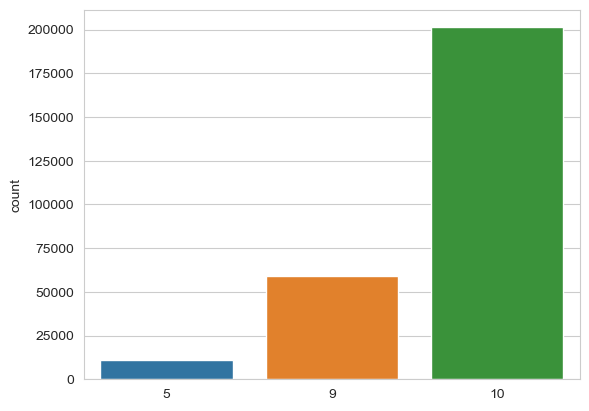

In [19]:
import seaborn as sns
sns.countplot(x = rfc_predict)

In [20]:
predictions = df_books.filter(regex="isbn13", axis=1)
predictions = predictions.reset_index()
predicted_ratings = pd.DataFrame(rfc_predict, columns=["predicted_book_rating"])
predictions = predictions.join(predicted_ratings)
predictions

,index,isbn13,predicted_book_rating
0,0,9780195153446,9
1,1,9780002005012,9
2,2,9780060973124,10
3,3,9780374157067,5
4,4,9780393045215,9
...,...,...,...
270939,270939,978044040095,10
270940,270940,978052544763,10
270941,270941,9780060086671,9
270942,270942,9780192126047,5


In [21]:
predictions = predictions.sort_values("predicted_book_rating", na_position="first", ascending=False)
predictions

,index,isbn13,predicted_book_rating
135472,135472,9780590428286,10
169756,169756,9781572930025,10
169725,169725,9780520075153,10
169726,169726,9780020412304,10
169727,169727,9780590314718,10
...,...,...,...
256654,256654,9780345352934,5
232007,232007,9780192811363,5
29782,29782,9780312866365,5
256658,256658,9780262561099,5


In [29]:
print("Prediciton for:")
print(user)
predictions.merge(books, on="isbn13", how="left")

Prediciton for:
   age  city state country
0   20  None  None     usa


,index,isbn13,predicted_book_rating,book_title,book_author,year_of_publication,publisher,image_url_s,image_url_m,image_url_l,rating_mean,rating_count,normalized_year_of_publication
0,135472,9780590428286,10,The Football Wars (Johnson Boys),Scott Eller,1992,other,http://images.amazon.com/images/P/0590428284.0...,http://images.amazon.com/images/P/0590428284.0...,http://images.amazon.com/images/P/0590428284.0...,0.0,0.0,13
1,169756,9781572930025,10,Raising Wordly-Wise but Innocent Kids: Wisdom ...,David Wyrtzen,1995,other,http://images.amazon.com/images/P/1572930020.0...,http://images.amazon.com/images/P/1572930020.0...,http://images.amazon.com/images/P/1572930020.0...,10.0,1.0,10
2,169725,9780520075153,10,"On Heroes, Hero-Worship, &amp; the Heroic in H...",Thomas Carlyle,1993,other,http://images.amazon.com/images/P/0520075153.0...,http://images.amazon.com/images/P/0520075153.0...,http://images.amazon.com/images/P/0520075153.0...,0.0,0.0,12
3,169726,9780020412304,10,"Little Women,: Or, Meg, Jo, Beth and Amy, Part...",Louisa May Alcott,1975,other,http://images.amazon.com/images/P/0020412304.0...,http://images.amazon.com/images/P/0020412304.0...,http://images.amazon.com/images/P/0020412304.0...,4.0,1.0,30
4,169727,9780590314718,10,Teaching with Favorite Marc Brown Books (Grade...,Sean Walmsley,1999,scholastic,http://images.amazon.com/images/P/0590314718.0...,http://images.amazon.com/images/P/0590314718.0...,http://images.amazon.com/images/P/0590314718.0...,0.0,0.0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
270941,256654,9780345352934,5,"The Destiny of the Sword (Seventh Sword, Book 3)",Dave Duncan,1990,other,http://images.amazon.com/images/P/0345352939.0...,http://images.amazon.com/images/P/0345352939.0...,http://images.amazon.com/images/P/0345352939.0...,0.0,0.0,15
270942,232007,9780192811363,5,Collected Plays (Includes a Dance of the Fores...,Wole Soyinka,1973,other,http://images.amazon.com/images/P/0192811363.0...,http://images.amazon.com/images/P/0192811363.0...,http://images.amazon.com/images/P/0192811363.0...,0.0,0.0,32
270943,29782,9780312866365,5,Jeremiah: Terrorist Prophet (Jeremiah),Michael A. Smith,1997,other,http://images.amazon.com/images/P/0312866364.0...,http://images.amazon.com/images/P/0312866364.0...,http://images.amazon.com/images/P/0312866364.0...,8.0,1.0,8
270944,256658,9780262561099,5,Artificial Minds,Stan Franklin,1997,other,http://images.amazon.com/images/P/0262561093.0...,http://images.amazon.com/images/P/0262561093.0...,http://images.amazon.com/images/P/0262561093.0...,9.0,1.0,8
